# Training with ImageDataGenerator

download horse-or-human.zip: open cmd and run this command below (in window sys):  
curl -o horse-or-human.zip https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
  
download validation-horse-or-human.zip: open cmd and run this command below (in window sys ):  
curl -o validation-horse-or-human.zip https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip


In [5]:
import zipfile

# # Unzip the dataset
# local_zip = './horse-or-human.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('./horse-or-human')
# zip_ref.close()

#unzip the validation dataset
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')
zip_ref.close()

In [2]:
import os

#directory with training horses pictures
train_horse_dir = os.path.join('horse-or-human/horses')

#directory with training human pitures
train_human_dir = os.path.join('horse-or-human/humans')

#directory with validation horses pictures
validation_horse_dir = os.path.join('validation-horse-or-human/horses/')

#directory with validation human pictures
validation_human_dir = os.path.join('validation-horse-or-human/humans/')

In [6]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_names = os.listdir(validation_horse_dir)
print(validation_horse_names[:10])

validation_human_name = os.listdir(validation_human_dir)
print(validation_human_name[:10])

print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']
['horse1-000.png', 'horse1-105.png', 'horse1-122.png', 'horse1-127.png', 'horse1-170.png', 'horse1-204.png', 'horse1-224.png', 'horse1-241.png', 'horse1-264.png', 'horse1-276.png']
['valhuman01-00.png', 'valhuman01-01.png', 'valhuman01-02.png', 'valhuman01-03.png', 'valhuman01-04.png', 'valhuman01-05.png', 'valhuman01-06.png', 'valhuman01-07.png', 'valhuman01-08.png', 'valhuman01-09.png']
total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


Now take a look at a few pictures to get a better sense of what they look like.

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#parameters 4 graphs; we'll output the image in 4x4 configuration
nrows = 4
ncols = 4

#index for iterating over images
pic_index = 0

display a batch of 8 horses and 8 human pictures

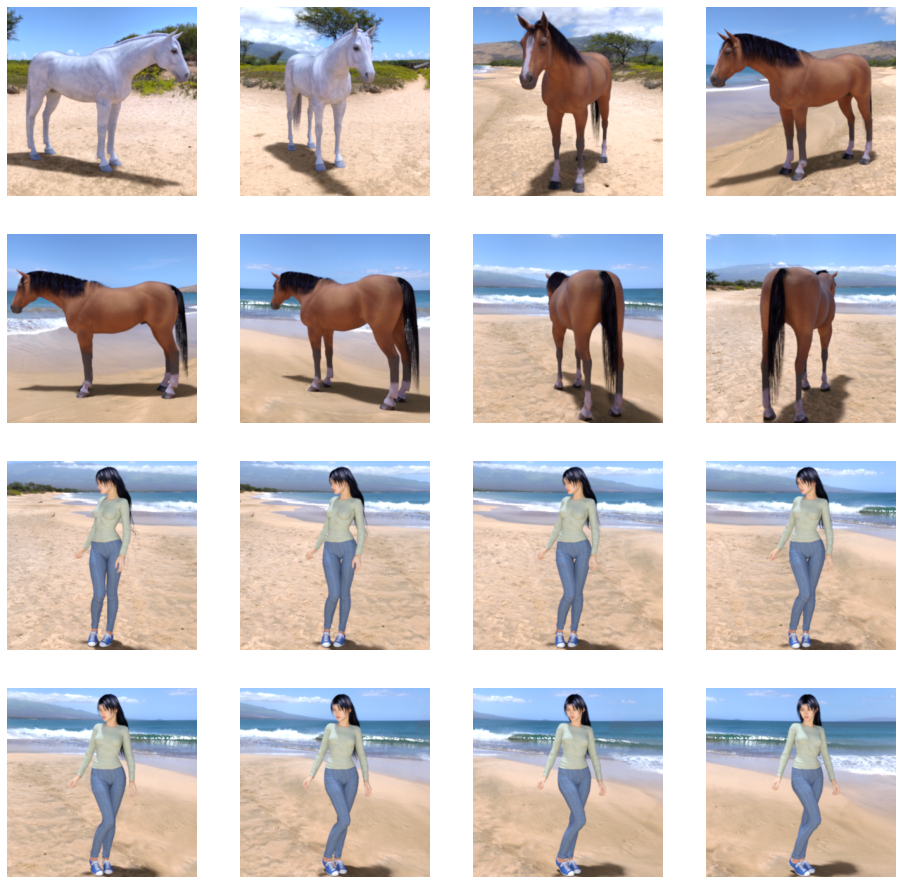

In [7]:
#set up matplot fig, and size it to 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Building a small modelo from Scratch

In [8]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    #this input shape is desired size of 300x300 cells and 3 bytes colors
    # the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #the second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #the third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #the fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #the fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #flatten layers to feed the output
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=0.001),
                metrics=['accuracy'])

## Data preprocessing
Next step is to set up the data generators that will read pictures in the source folders, convert them to *float32* tensors, and feed them (with their labels) to the model. You'll have one generator for the training images and one for the validation images. These generators will yield batches of images of size 300x300 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network (i.e. It is uncommon to feed raw pixels into a ConvNet.) In this case, you will preprocess the images by normalizing the pixel values to be in the *[0, 1]* range (originally all values are in the *[0, 255]* range).

In Keras, this can be done via the *keras.preprocessing.image.ImageDataGenerator* class using the *rescale* parameter. This *ImageDataGenerator class* allows you to instantiate generators of augmented image batches (and their labels) via *.flow(data, labels)* or *.flow_from_directory(directory)*.

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# all images will be rescaled by 1/255.
train_datagen = ImageDataGenerator(rescale = 1/255)
validation_datagen = ImageDataGenerator(rescale = 1/255)

#flow training data in batches of 128 using train data generator
train_generator = train_datagen.flow_from_directory(
    './horse-or-human/', #source directory for image data
    target_size=(300, 300),
    batch_size=128,
    #since we use binary_crossentropy loss, we need binary labels
    class_mode='binary'
)

#flow validation data in batches of 128 using validation data generator
validation_generator = validation_datagen.flow_from_directory(
    './validation-horse-or-human/', # source directory for image data
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [11]:
history = model.fit(
    train_generator, 
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=8
)

Epoch 1/15
8/8 [==============================] - 83s 10s/step - loss: 0.7140 - accuracy: 0.5078 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 44s 5s/step - loss: 0.7669 - accuracy: 0.5473
Epoch 3/15
8/8 [==============================] - 40s 6s/step - loss: 0.6017 - accuracy: 0.7052
Epoch 4/15
8/8 [==============================] - 40s 5s/step - loss: 0.5708 - accuracy: 0.7353
Epoch 5/15
8/8 [==============================] - 40s 6s/step - loss: 0.5587 - accuracy: 0.7931
Epoch 6/15
8/8 [==============================] - 46s 6s/step - loss: 0.3646 - accuracy: 0.8389
Epoch 7/15
8/8 [==============================] - 40s 5s/step - loss: 0.2953 - accuracy: 0.8598
Epoch 8/15
8/8 [==============================] - 42s 5s/step - loss: 0.1091 - accuracy: 0.9666
Epoch 9/15
8/8 [==============================] - 41s 5s/step - loss: 0.2168 - accuracy: 0.9188
Epoch 10/15
8/8 [==============================] - 51s 6s/step - loss: 0.8918 - accuracy: 0.8

## model prediction
Now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, upload them, and run them through the model, giving an indication of whether the object is a horse or a human.

*Note: Old versions of the Safari browser might have compatibility issues with the code block below. If you get an error after you select the images(s) to upload, you can consider updating your browser to the latest version. If not possible, please comment out or skip the code block below, uncomment the next code block and run it.*

['360_F_292287867_hC2Owo0yInRruYbxZXKoJZhB7YUCHdmp.jpg', 'download (1).jfif', 'download.jfif', 'images (1).jfif', 'images (2).jfif', 'images (3).jfif', 'images.jfif']

1/1 [==============================] - 1s 627ms/step
[0.99947506]


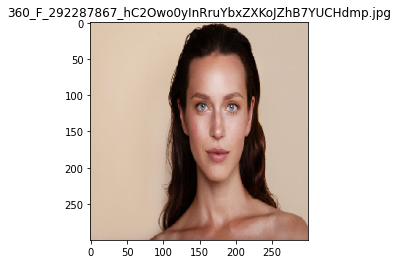

360_F_292287867_hC2Owo0yInRruYbxZXKoJZhB7YUCHdmp.jpg is a human

1/1 [==============================] - 0s 42ms/step
[0.9999999]


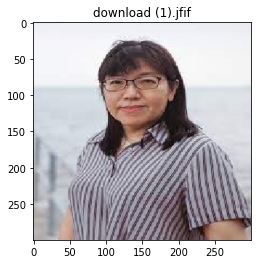

download (1).jfif is a human

1/1 [==============================] - 0s 41ms/step
[0.00435154]


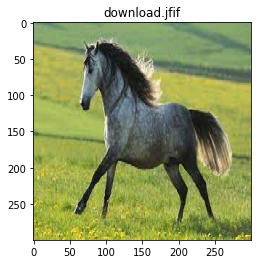

download.jfif is a horse

1/1 [==============================] - 0s 46ms/step
[0.9679432]


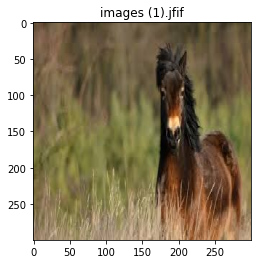

images (1).jfif is a human

1/1 [==============================] - 0s 98ms/step
[0.39988118]


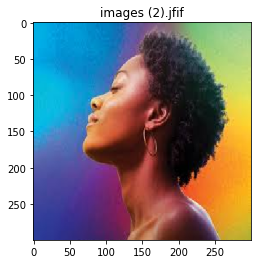

images (2).jfif is a horse

1/1 [==============================] - 0s 47ms/step
[0.99990845]


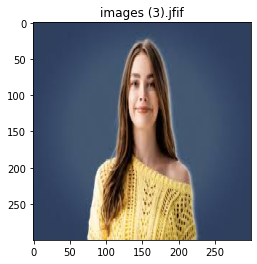

images (3).jfif is a human

1/1 [==============================] - 0s 46ms/step
[0.99999195]


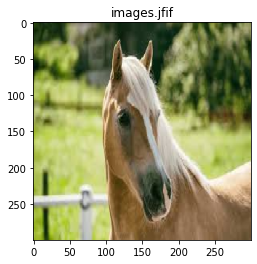

images.jfif is a human


In [12]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
import os

images = os.listdir("/machine learning/practice/tensorflow/images")
print(images)

for i in images:
    print()
    # predicting images
    path = '/machine learning/practice/tensorflow/images/' + i
    img = load_img(path, target_size=(300, 300))
    x = img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])

    plt.imshow(img)
    plt.title(i)
    plt.show()

    if classes[0]>0.5:
        print(i + " is a human")
    else:
        print(i + " is a horse")

## visualizing intermediate representations
To get a feel for what kind of features your CNN has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the model.

You can pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

1/1 [==============================] - 0s 242ms/step


C:\Users\MYPC~1\AppData\Local\Temp/ipykernel_12584/2673713834.py:45: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
C:\Users\MYPC~1\AppData\Local\Temp/ipykernel_12584/2673713834.py:48: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


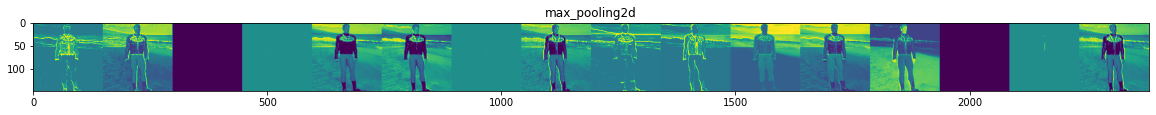

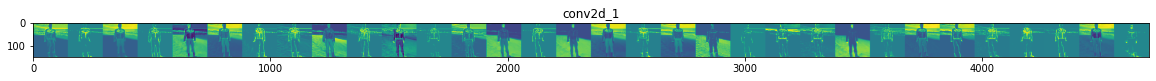

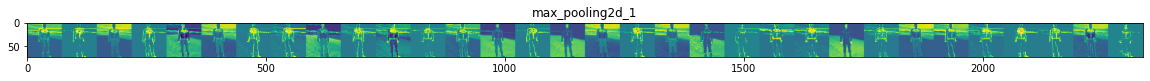

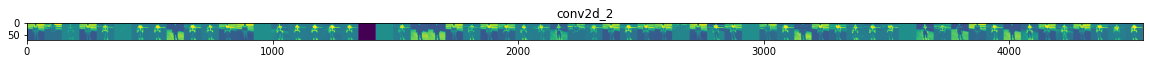

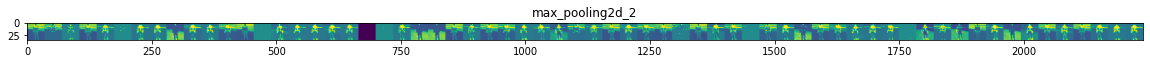

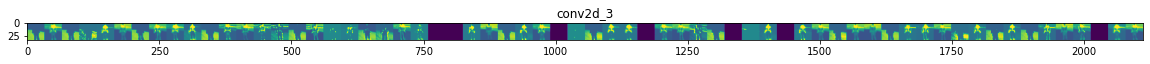

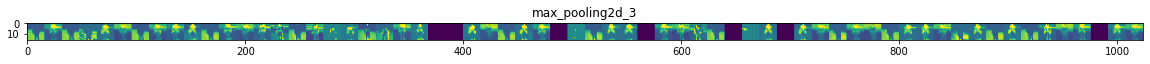

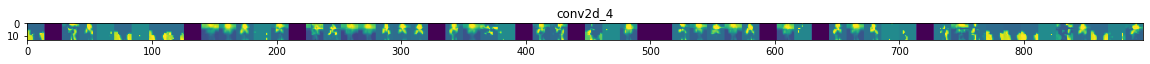

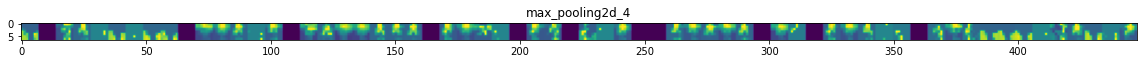

In [13]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# define an new model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after the first

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

#prepare a random input image from the training dataset
horse_img_file = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_file = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_file + human_img_file)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
        x = feature_map[0, :, :, i]
        x -= x.mean()
        x /= x.std()
        x *= 64
        x += 128
        x = np.clip(x, 0, 255).astype('uint8')
    
        # Tile each filter into this big horizontal grid
        display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')